# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import seaborn as sns

# Importing dataset

In [2]:
df = pd.read_csv('C:\\Users\\Apoorv\\Downloads\\Bank Customer Churn Prediction.csv')

# Exploratory Data Analysis

In [3]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Dimensions of the dataset

In [4]:
df.shape

(10000, 12)

### Columns in the dataset

In [5]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

### Checking for missing values in the dataset

In [6]:
df.isna().any()

customer_id         False
credit_score        False
country             False
gender              False
age                 False
tenure              False
balance             False
products_number     False
credit_card         False
active_member       False
estimated_salary    False
churn               False
dtype: bool

### Information of the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


### Removing Unnecessary columns

In [8]:
df = df.drop(columns = ["customer_id"])

### Statistics of the variables in the dataset

In [9]:
df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<AxesSubplot:xlabel='active_member', ylabel='count'>

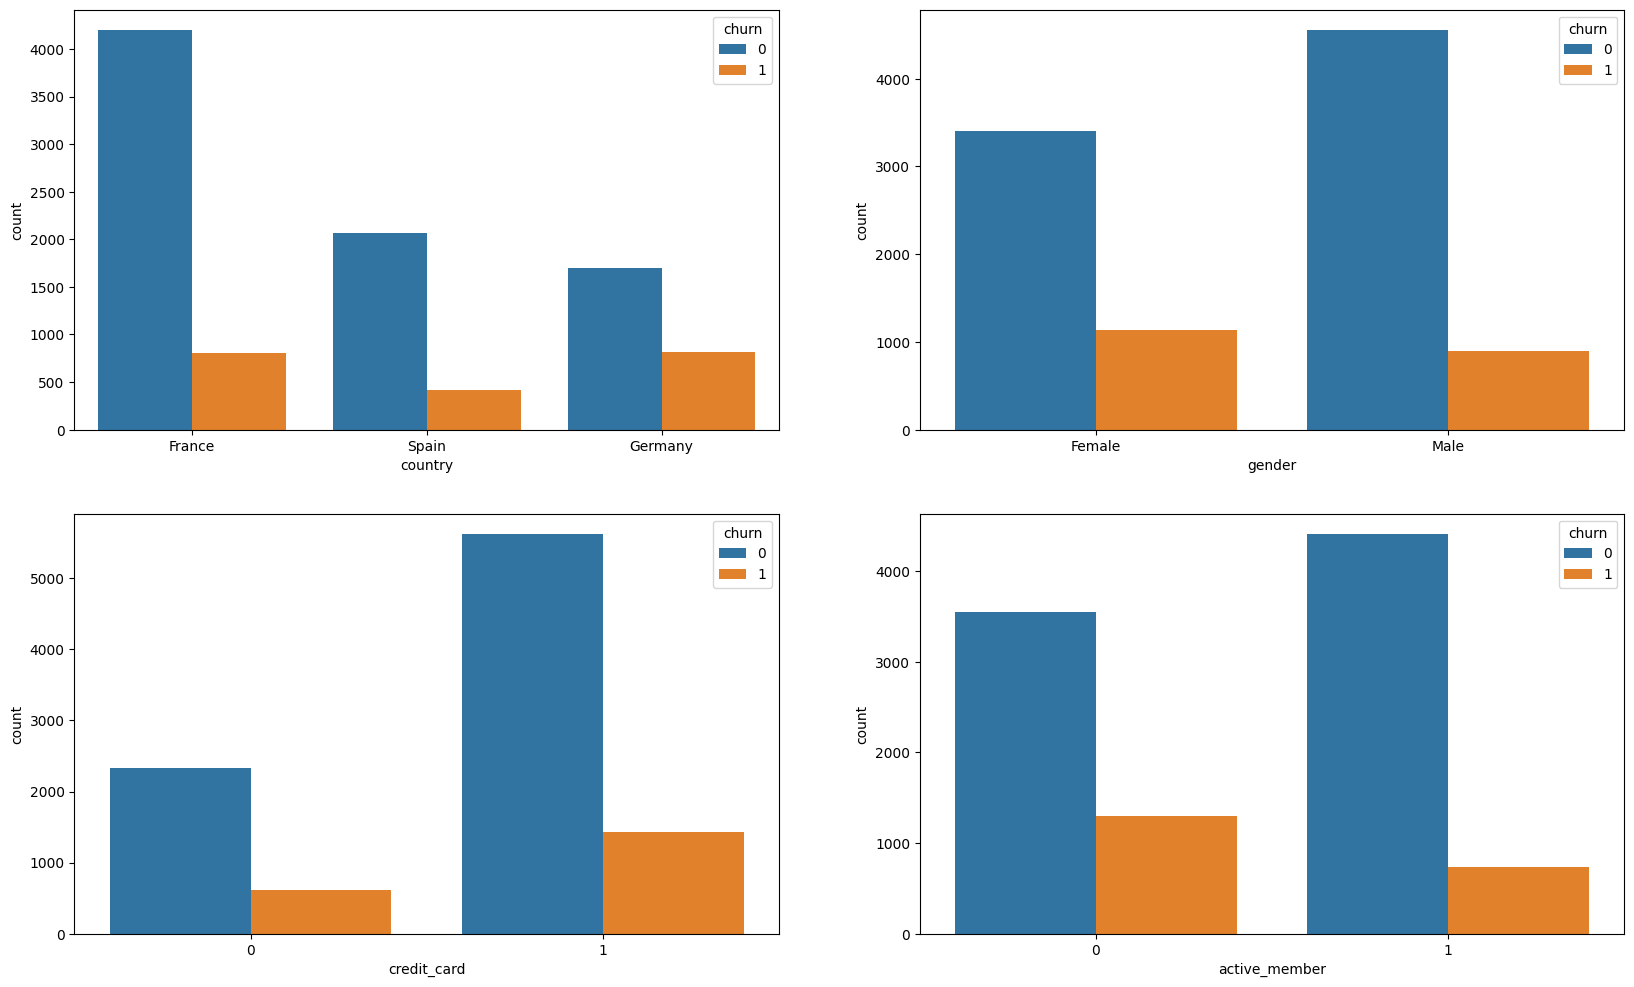

In [10]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sn.countplot(x='country', hue = 'churn',data = df, ax=axarr[0][0])
sn.countplot(x='gender', hue = 'churn',data = df, ax=axarr[0][1])
sn.countplot(x='credit_card', hue = 'churn',data = df, ax=axarr[1][0])
sn.countplot(x='active_member', hue = 'churn',data = df, ax=axarr[1][1])

<AxesSubplot:xlabel='churn', ylabel='count'>

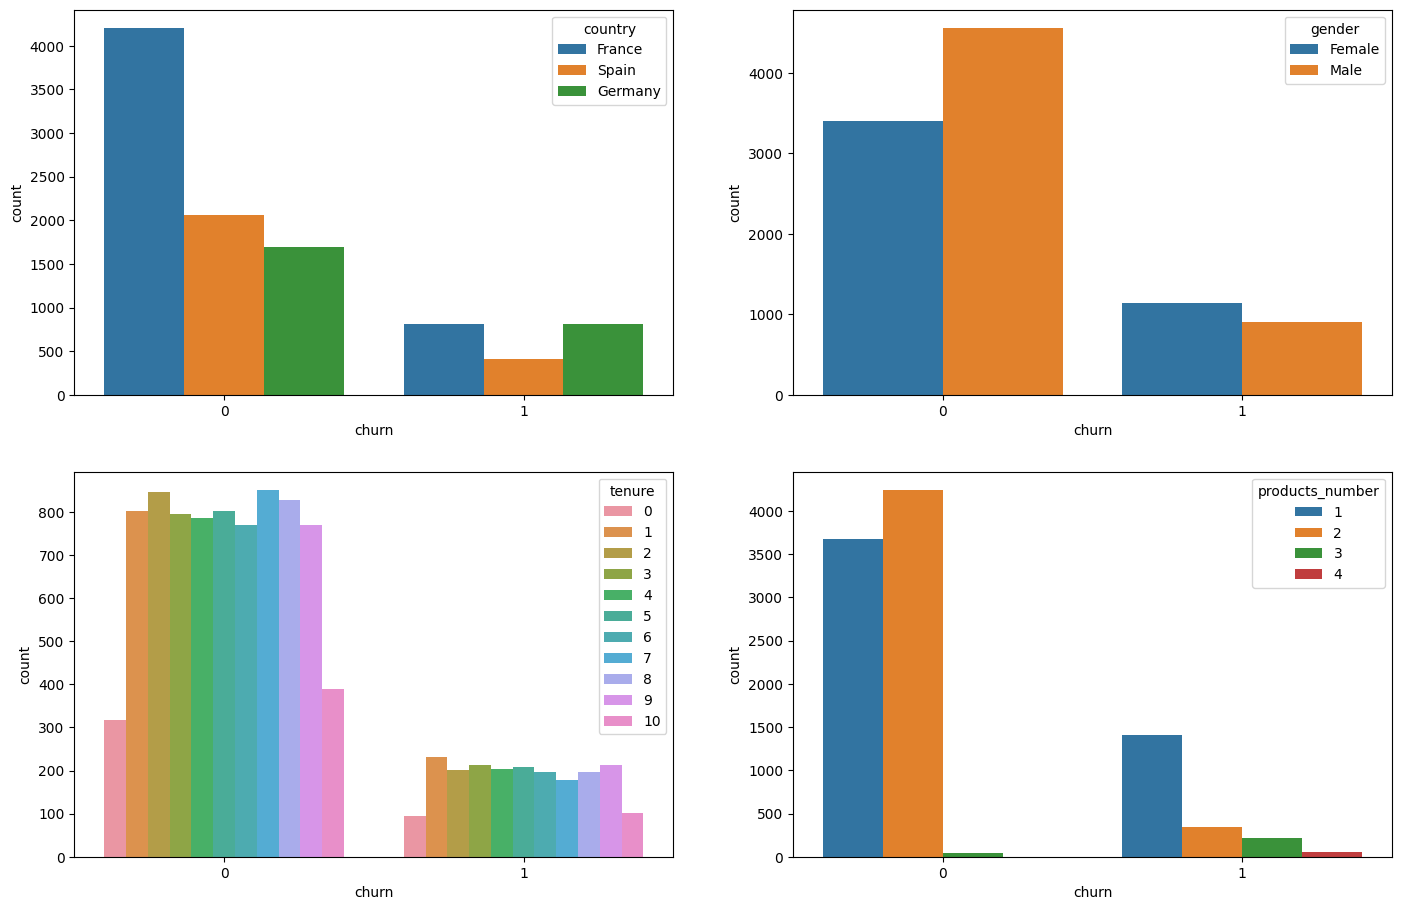

In [11]:
plt.figure(figsize = (17, 17))

plt.subplot(3,2,1)
sns.countplot(x = 'churn', hue='country', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'churn', hue='gender', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'churn', hue='tenure', data = df)

plt.subplot(3,2,4)
sns.countplot(x = 'churn', hue='products_number',data = df)

### Check if data is balanced

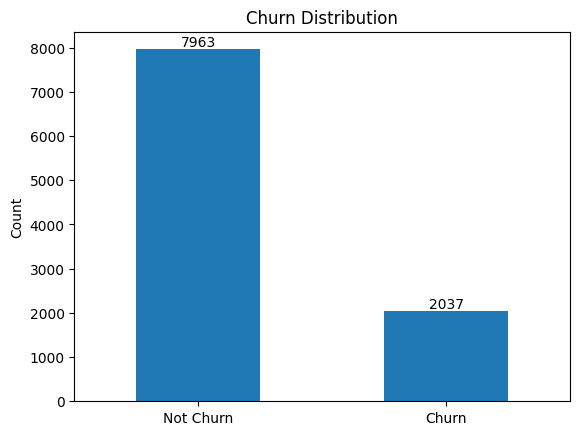

In [12]:
# plot bar chart
ax = df['churn'].value_counts().plot.bar()
ax.set_xticklabels(['Not Churn', 'Churn'], rotation=0)
ax.set_ylabel('Count')
ax.set_title('Churn Distribution')

# add numbers on top of bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)

plt.show()

### Box plots to check for outliers

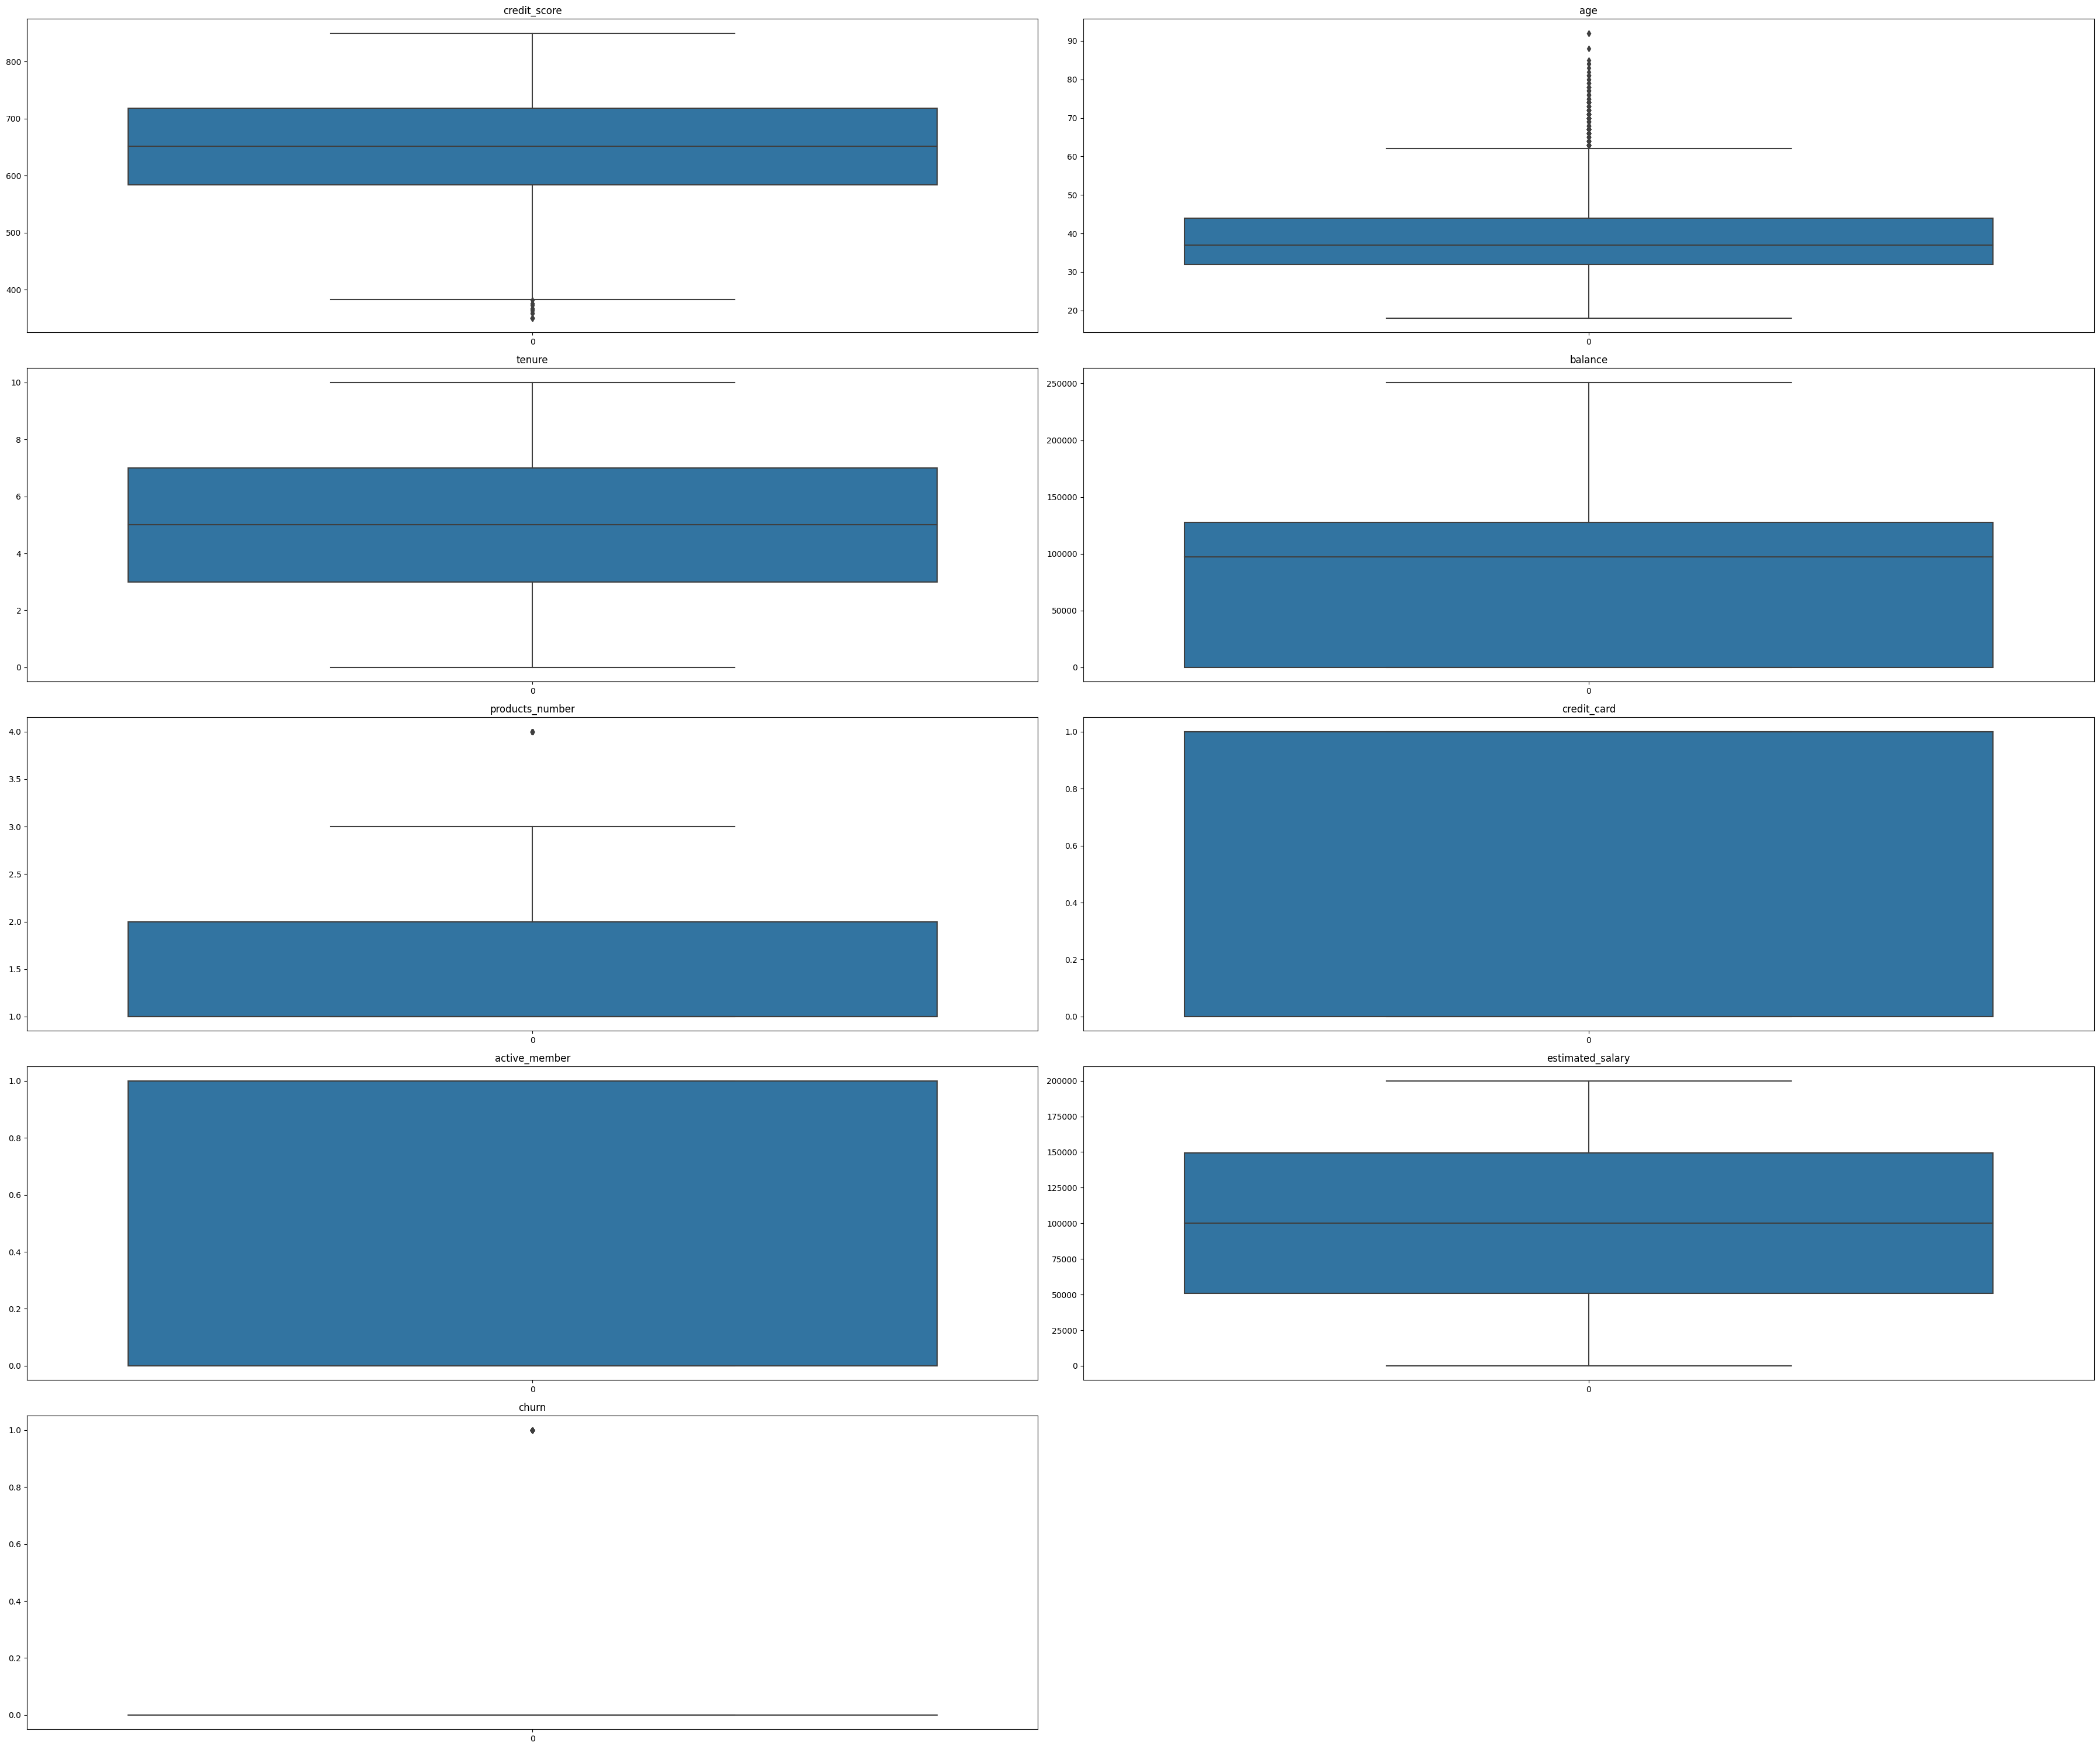

In [13]:
n = 1
plt.figure(figsize=(36,30))
for column in df.describe().columns:
    plt.subplot(5, 2, n)
    n = n+1
    sn.boxplot(df[column])
    plt.title(str(column))
    plt.tight_layout()

### One Hot Encoding

In [14]:
from sklearn import preprocessing 

onehot = pd.get_dummies(df, columns=['gender', 'country'])
onehot

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,gender_Female,gender_Male,country_France,country_Germany,country_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,1,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,1,0


In [15]:
# For the one hot variables, we change 0 to -1 so that the models can capture a negative relation where the attribute in inapplicable instead of 
onehot.loc[onehot.credit_card == 0, 'credit_card'] = -1
onehot.loc[onehot.active_member == 0, 'active_member'] = -1


onehot['gender_Female'] = onehot['gender_Female'].astype(int)
onehot['gender_Male'] = onehot['gender_Male'].astype(int)

onehot.loc[onehot.gender_Female == 0, 'gender_Female'] = -1
onehot.loc[onehot.gender_Male == 0, 'gender_Male'] = -1


onehot['country_France'] = onehot['country_France'].astype(int)
onehot['country_Germany'] = onehot['country_Germany'].astype(int)
onehot['country_Spain'] = onehot['country_Spain'].astype(int)

onehot.loc[onehot.country_France == 0, 'country_France'] = -1
onehot.loc[onehot.country_Germany == 0, 'country_Germany'] = -1
onehot.loc[onehot.country_Spain == 0, 'country_Spain'] = -1
onehot.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,gender_Female,gender_Male,country_France,country_Germany,country_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,-1,1,-1,-1
1,608,41,1,83807.86,1,-1,1,112542.58,0,1,-1,-1,-1,1
2,502,42,8,159660.80,3,1,-1,113931.57,1,1,-1,1,-1,-1
3,699,39,1,0.00,2,-1,-1,93826.63,0,1,-1,1,-1,-1
4,850,43,2,125510.82,1,1,1,79084.10,0,1,-1,-1,-1,1


In [16]:
df = onehot
df

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,gender_Female,gender_Male,country_France,country_Germany,country_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,-1,1,-1,-1
1,608,41,1,83807.86,1,-1,1,112542.58,0,1,-1,-1,-1,1
2,502,42,8,159660.80,3,1,-1,113931.57,1,1,-1,1,-1,-1
3,699,39,1,0.00,2,-1,-1,93826.63,0,1,-1,1,-1,-1
4,850,43,2,125510.82,1,1,1,79084.10,0,1,-1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,-1,96270.64,0,-1,1,1,-1,-1
9996,516,35,10,57369.61,1,1,1,101699.77,0,-1,1,1,-1,-1
9997,709,36,7,0.00,1,-1,1,42085.58,1,1,-1,1,-1,-1
9998,772,42,3,75075.31,2,1,-1,92888.52,1,-1,1,-1,1,-1


In [17]:
df['balancesalaryratio'] = df.balance/df.estimated_salary
df['tenurebyage'] = df.tenure/df.age
df['creditscoregivenage'] = df.credit_score/df.age

In [18]:
df

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,gender_Female,gender_Male,country_France,country_Germany,country_Spain,balancesalaryratio,tenurebyage,creditscoregivenage
0,619,42,2,0.00,1,1,1,101348.88,1,1,-1,1,-1,-1,0.000000,0.047619,14.738095
1,608,41,1,83807.86,1,-1,1,112542.58,0,1,-1,-1,-1,1,0.744677,0.024390,14.829268
2,502,42,8,159660.80,3,1,-1,113931.57,1,1,-1,1,-1,-1,1.401375,0.190476,11.952381
3,699,39,1,0.00,2,-1,-1,93826.63,0,1,-1,1,-1,-1,0.000000,0.025641,17.923077
4,850,43,2,125510.82,1,1,1,79084.10,0,1,-1,-1,-1,1,1.587055,0.046512,19.767442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,-1,96270.64,0,-1,1,1,-1,-1,0.000000,0.128205,19.769231
9996,516,35,10,57369.61,1,1,1,101699.77,0,-1,1,1,-1,-1,0.564108,0.285714,14.742857
9997,709,36,7,0.00,1,-1,1,42085.58,1,1,-1,1,-1,-1,0.000000,0.194444,19.694444
9998,772,42,3,75075.31,2,1,-1,92888.52,1,-1,1,-1,1,-1,0.808230,0.071429,18.380952


### Histogram to check distribution of data

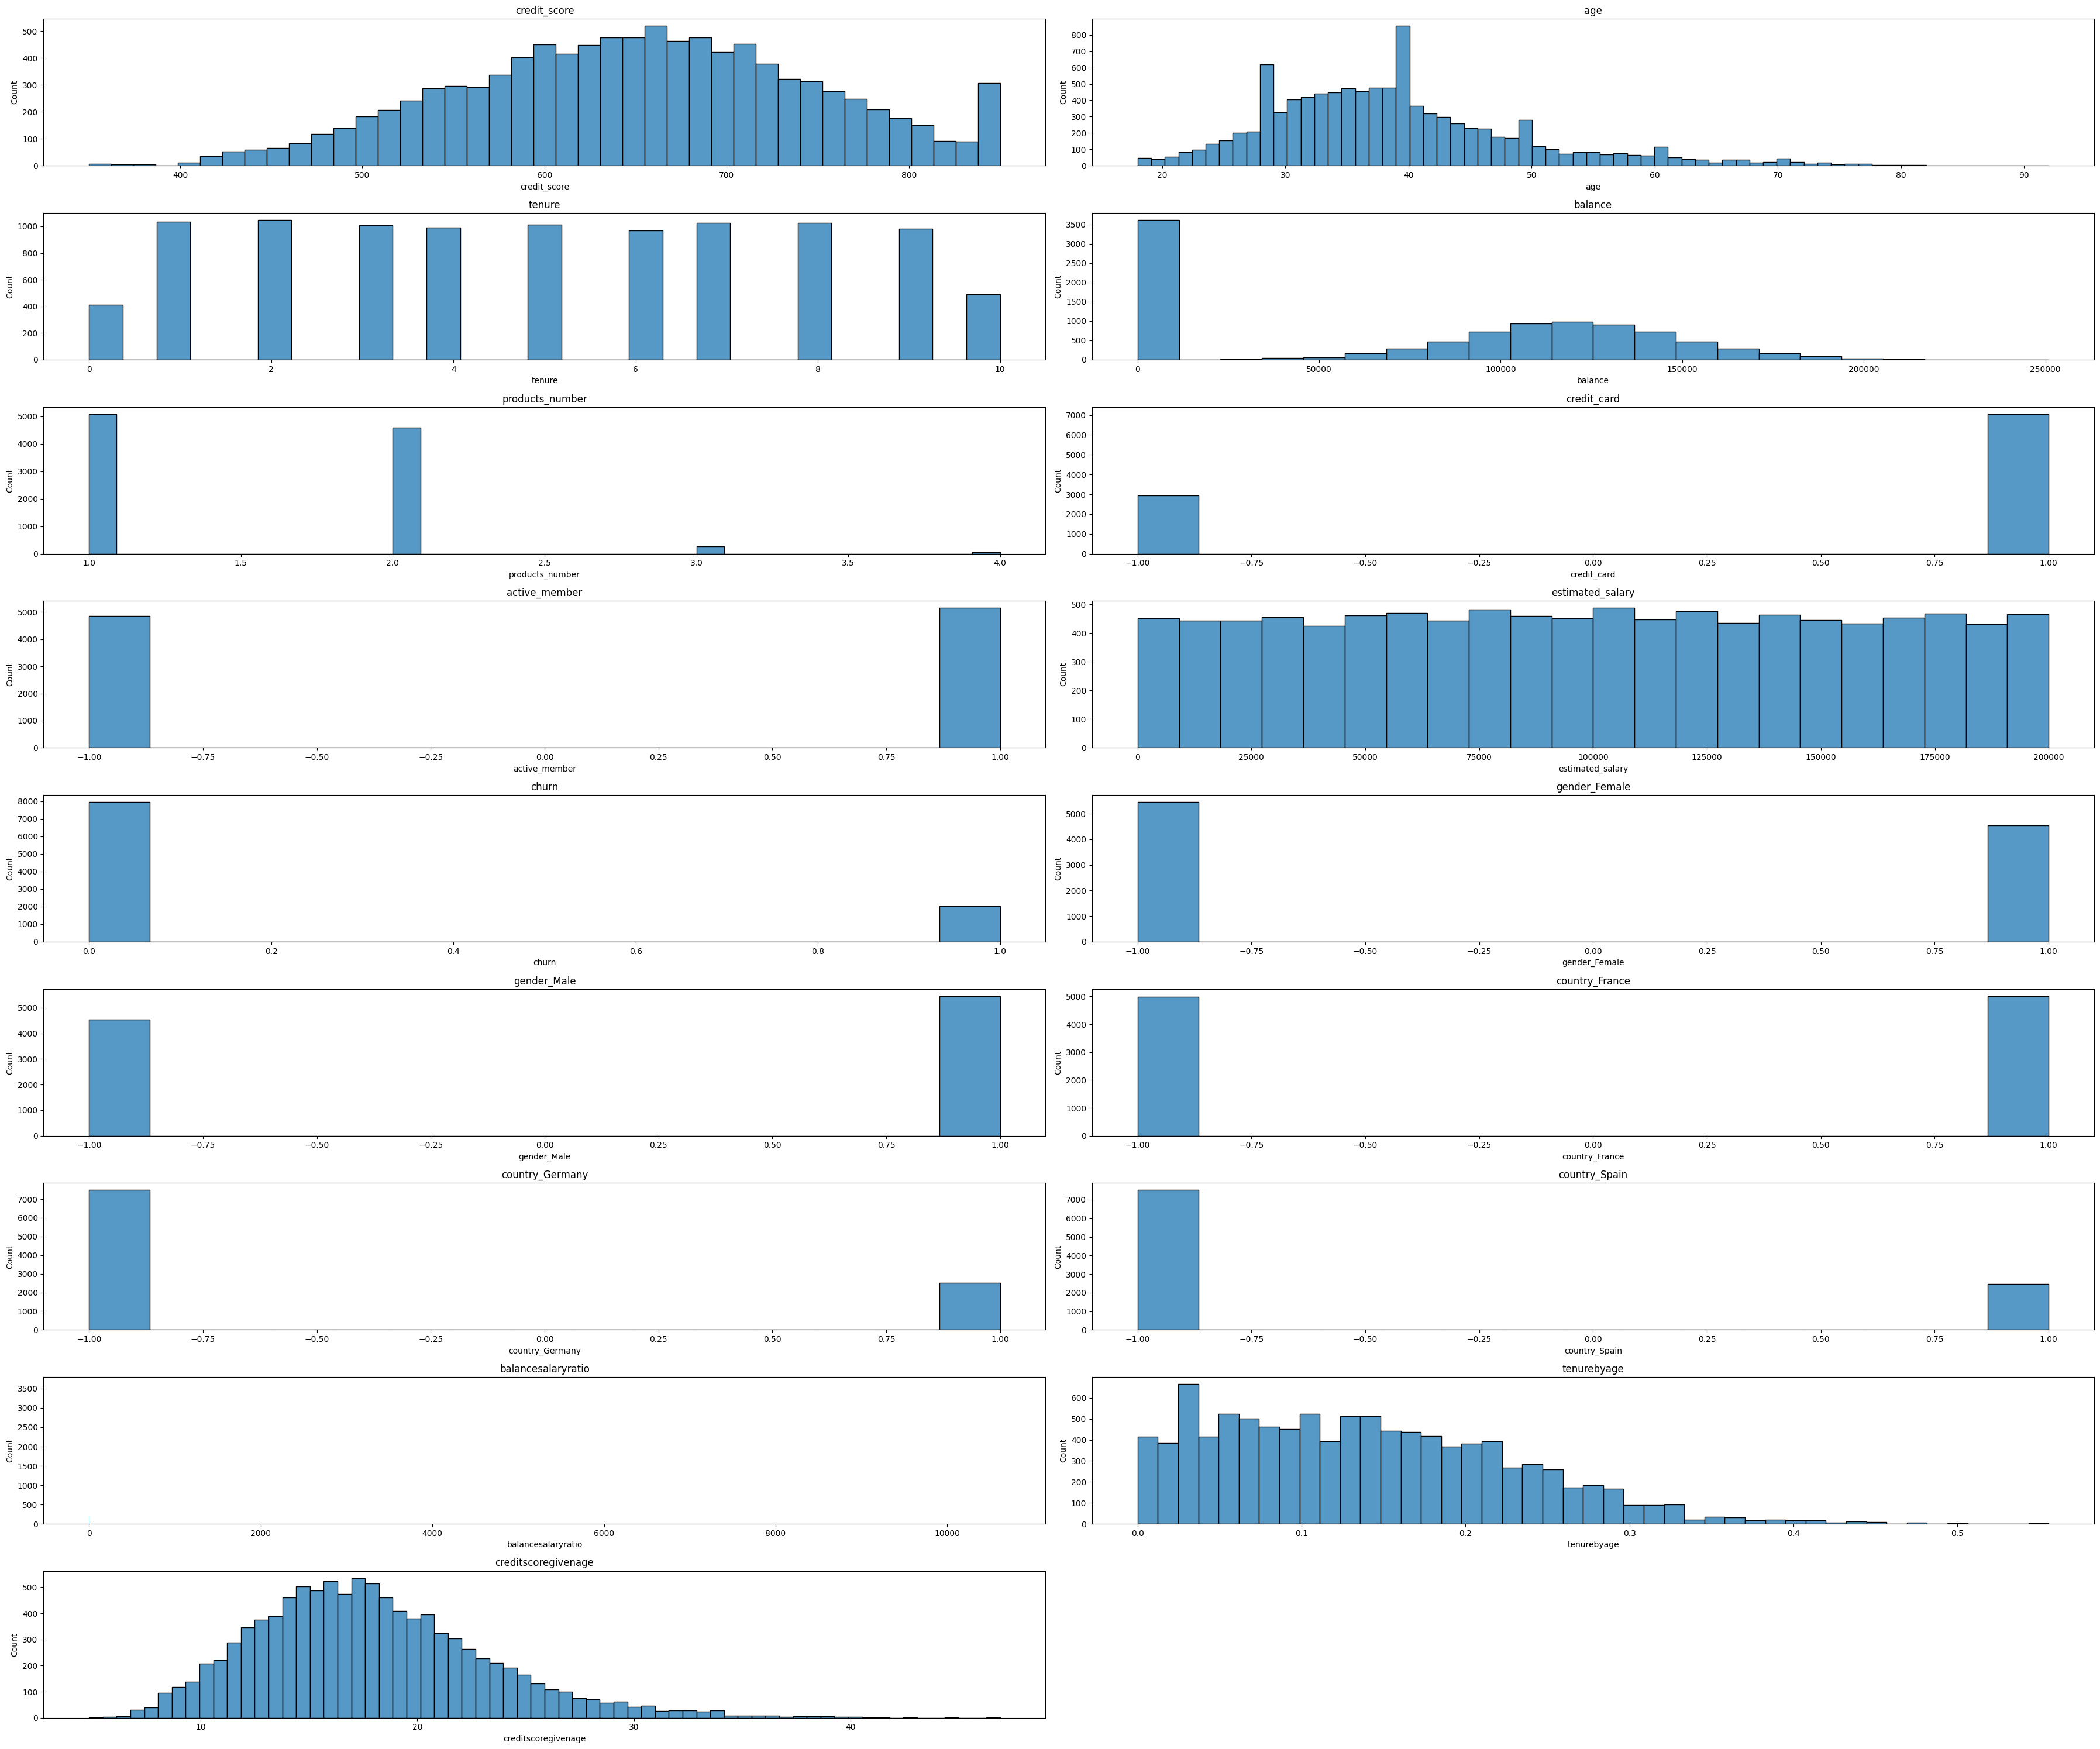

In [19]:
n = 1
plt.figure(figsize=(36,30))
for column in df.describe().columns:
    plt.subplot(9, 2, n)
    n = n+1
    sn.histplot(df[column])
    plt.title(str(column))
    plt.tight_layout()

### Correlation with Response Variable

<AxesSubplot:title={'center':'Correlation with Churn'}>

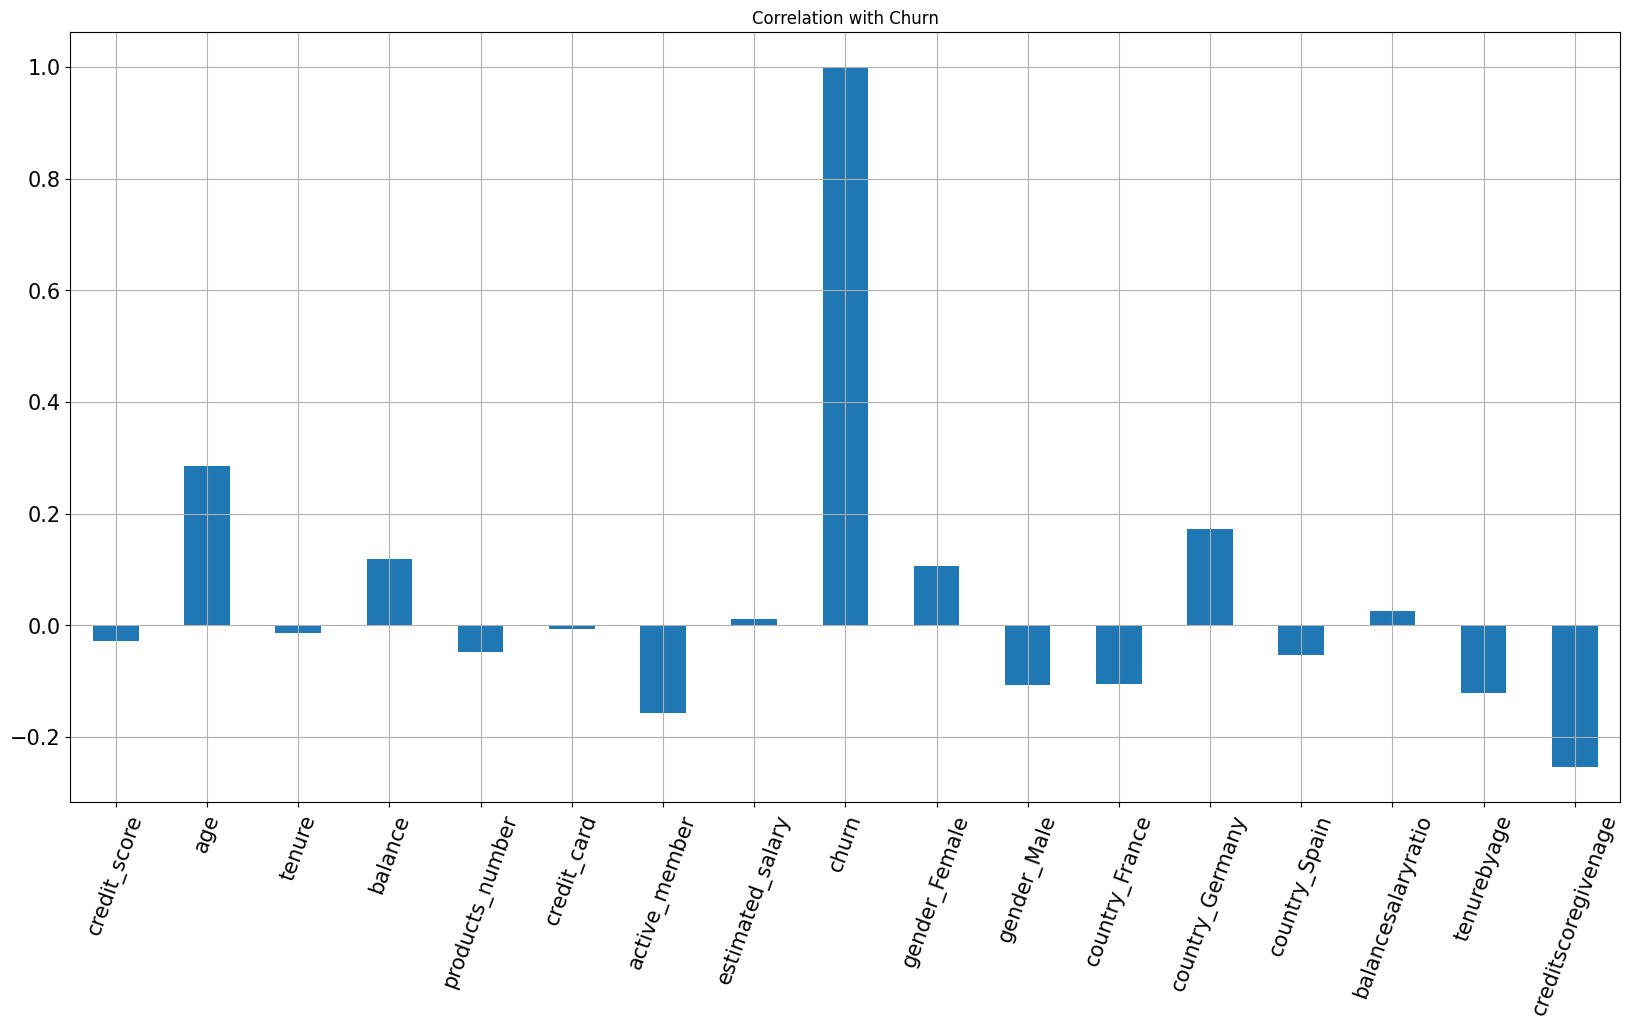

In [20]:
df.corrwith(df['churn']).plot.bar(
        figsize = (20, 10), title = "Correlation with Churn", fontsize = 15,
        rot = 70, grid = True)

### Correlation Matrix

C:\Users\Apoorv\AppData\Local\Temp\ipykernel_14280\3657059153.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

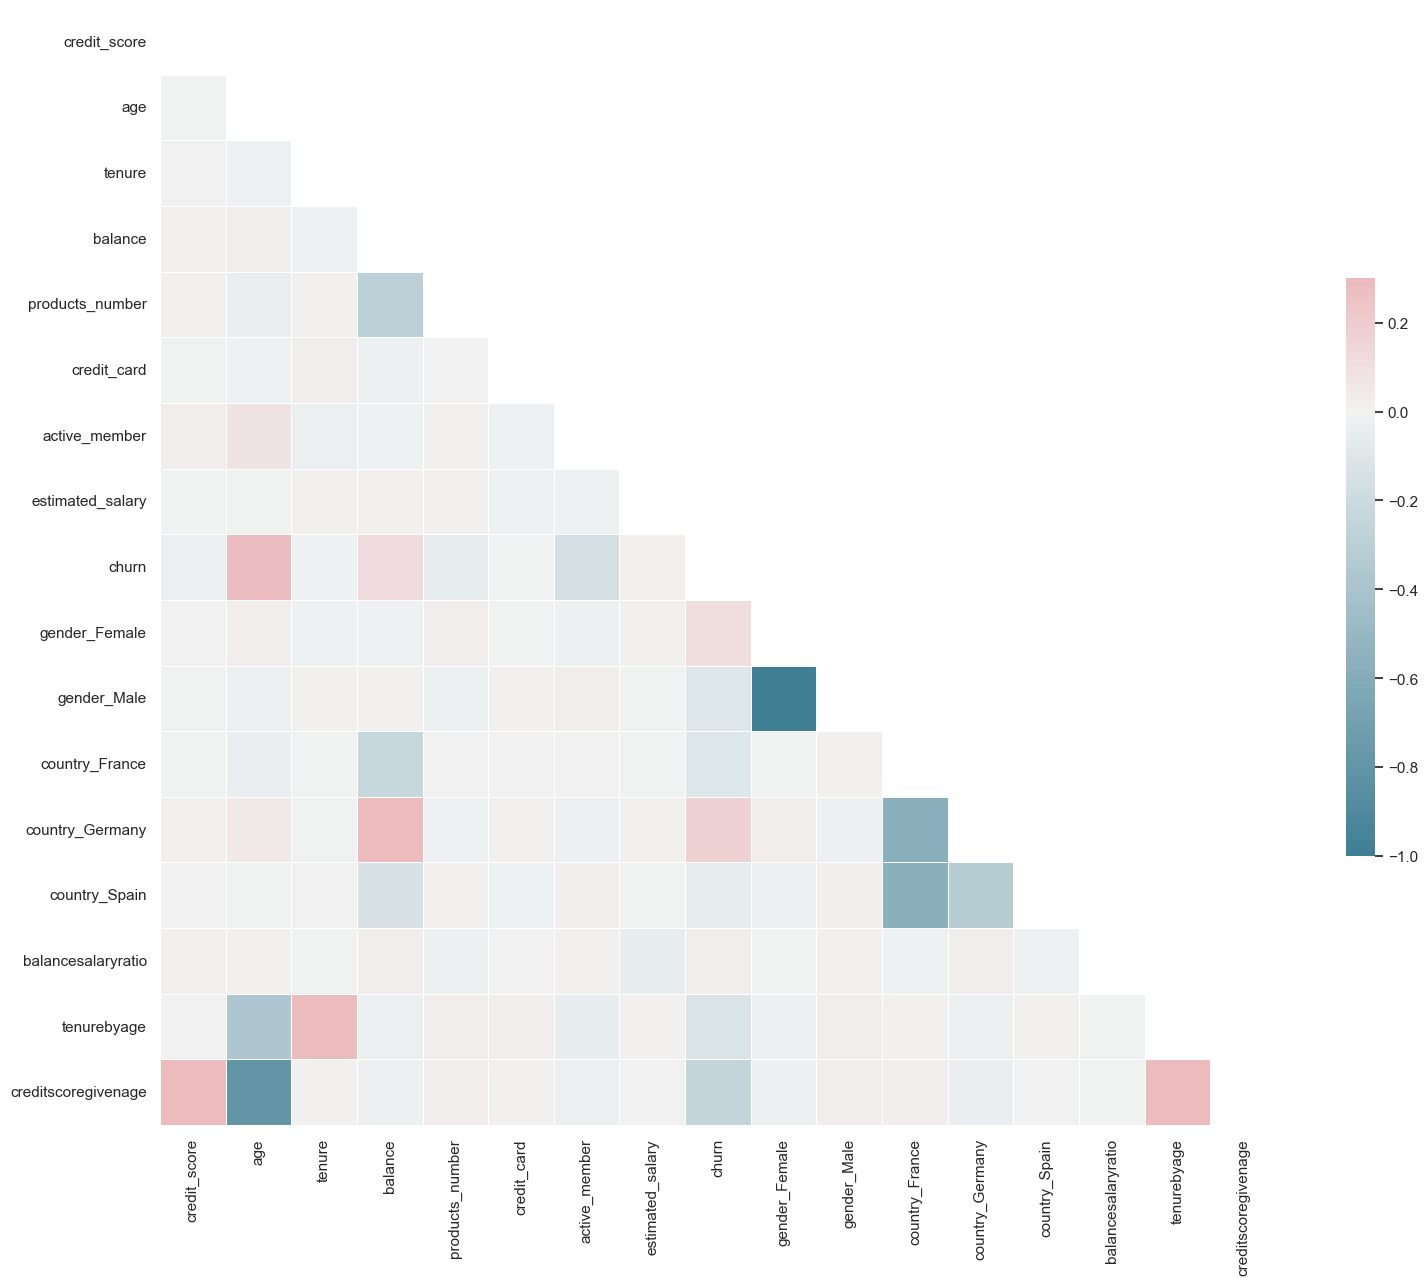

In [21]:
sn.set(style="white")

# Compute the correlation matrix|
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})